In [1]:
from qlasskit import qlassf, Qint

@qlassf
def func_max(a: Qint[3]) -> Qint[5]:
    m = 0
    for i in range(4):
        m = max(((a + i) ** 2), m)
    return m

OrderedDict([('x', 13), ('cx', 10), ('ccx', 6), ('mcx', 2)])
Output: [5, 6, 7, 8, 13]


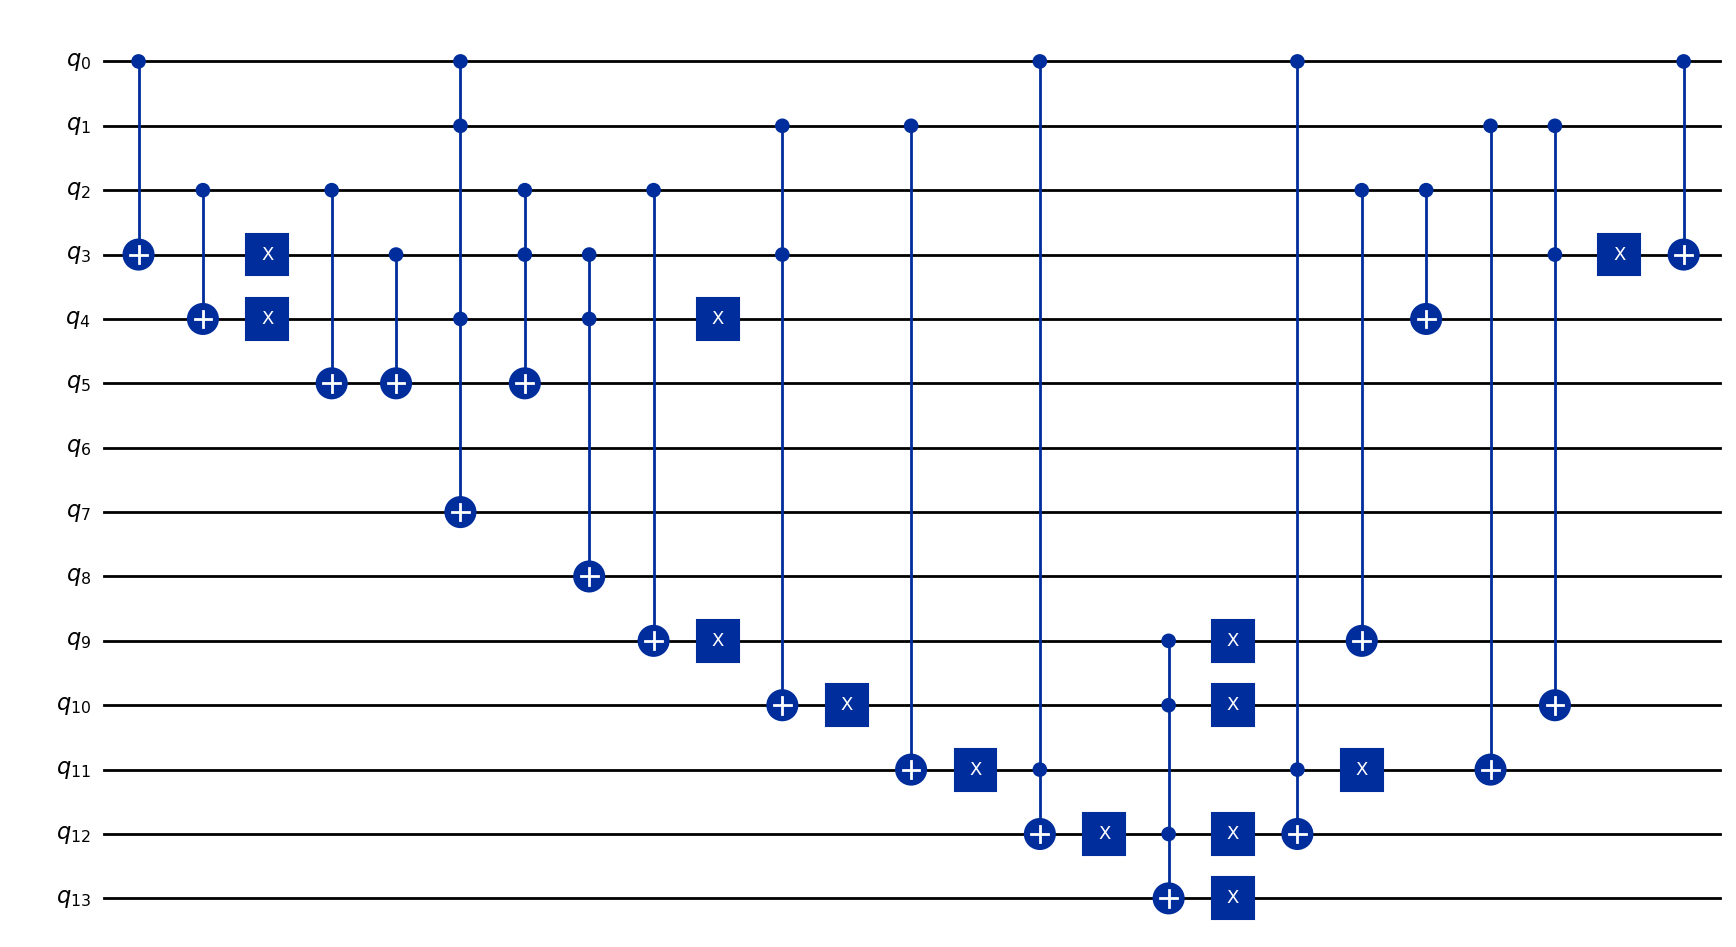

In [2]:
circuit = func_max.export("qiskit")
print(circuit.count_ops())
print("Output: " + str(func_max.output_qubits))
circuit.draw("mpl")

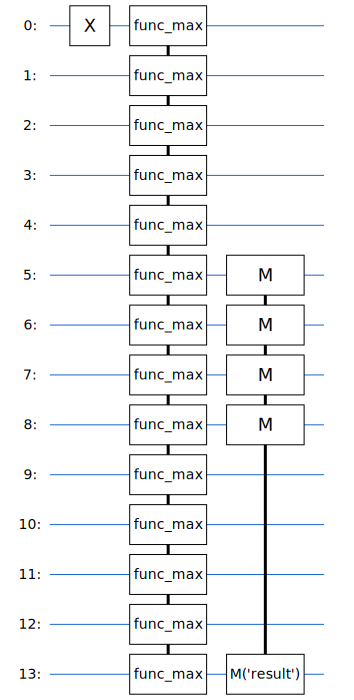

In [3]:
from cirq.contrib.svg import SVGCircuit
import cirq
circuit = cirq.Circuit()
circuit.append(cirq.X(cirq.LineQubit(0)))
circuit.append(func_max.export("cirq"))
#SVGCircuit(circuit)
#circuit = sum_two_numbers.export("cirq") [8, 13, 9, 11, 9, 12]
lista = func_max.output_qubits[::-1]
circuit.append(cirq.measure([cirq.LineQubit(i) for i in lista], key='result'))


# Add noise to the circuit.
noisy = circuit.with_noise(cirq.depolarize(p=0.05))

#noisy = circuit.with_noise(noise_model)

SVGCircuit(circuit)

Simulate the circuit:
16


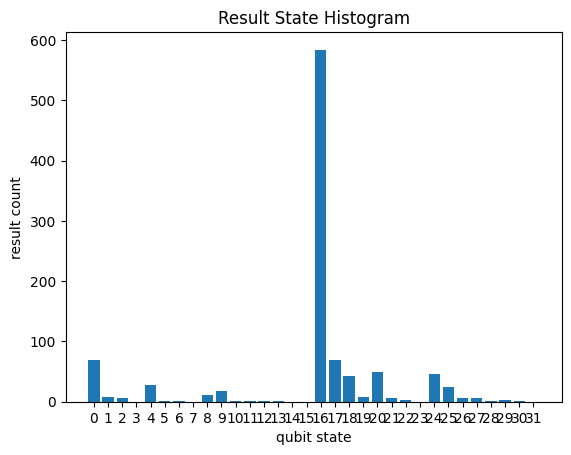

In [5]:
import qsimcirq
import matplotlib.pyplot as plt

qsim_simulator = qsimcirq.QSimSimulator()
print('Simulate the circuit:')
# Sample the circuit

samples = qsim_simulator.run(noisy, repetitions=1000)
print(samples.data['result'].mode()[0])
cirq.plot_state_histogram(samples, plt.subplot())
plt.show()


Simulate the circuit:
16


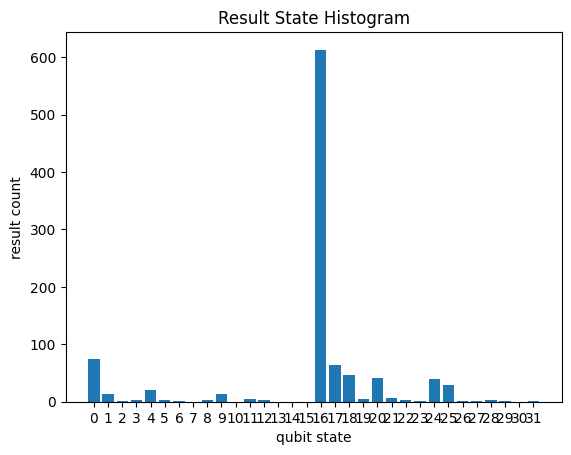

"for i, step in enumerate(s.simulate_moment_steps(circuit)):\n    print('state at step %d: %s' % (i, np.around(step.state_vector(copy=True), 3)))"

In [6]:
import matplotlib.pyplot as plt
import numpy as np

s = cirq.Simulator()
print('Simulate the circuit:')
# Sample the circuit

samples = s.run(noisy, repetitions=1000)
print(samples.data['result'].mode()[0])
cirq.plot_state_histogram(samples, plt.subplot())
plt.show()
'''for i, step in enumerate(s.simulate_moment_steps(circuit)):
    print('state at step %d: %s' % (i, np.around(step.state_vector(copy=True), 3)))'''
